In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from torch import nn
import torch.nn.functional as tf
from torch import optim
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")

/var/folders/bd/j2nflt_j2rb8jwwv_ggtqnn40000gn/T/ipykernel_53846/951773449.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")


In [3]:
len(df)

5109775

In [4]:
df.head(100)

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.00,0.00
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.00,0.00
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.00,0.00
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.00,0.00
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,DIMARCO,ANTONIO,D,04/13/2020,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,75197.0,per Annum,350.0,14381.95,204.5,10917.33,14.40
96,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,PRUSSIEN JR,PIERRE,C,04/01/2019,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,CEASED,63860.0,per Annum,700.0,23805.91,28.0,1085.96,40.75
97,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,PASCALL,CINDY-ANN,NaN,07/24/2017,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,CEASED,66603.0,per Annum,665.0,23554.17,0.0,0.00,58.75
98,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,HABINSKY,MICHAEL,NaN,03/30/2020,BROOKLYN,EMERGENCY PREPAREDNESS SPECIALIST,ACTIVE,100000.0,per Annum,420.0,22568.33,0.0,0.00,0.00


In [5]:
df.tail()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
5109770,2022,2.0,OFFICE OF THE MAYOR,ZHANG,JIN,NaN,12/09/2019,MANHATTAN,Senior Project Planner,CEASED,110000.00,per Annum,49.00,2953.16,0.0,0.0,1883.56
5109771,2022,2.0,OFFICE OF THE MAYOR,ZHAO,XIAOMIN,NaN,09/04/2018,MANHATTAN,SPECIAL ASSISTANT,CEASED,71974.00,per Annum,980.00,38649.10,0.0,0.0,0.00
5109772,2022,2.0,OFFICE OF THE MAYOR,ZHENG,SANDY,NaN,06/08/2022,MANHATTAN,SUMMER COLLEGE INTERN,ACTIVE,15.75,per Hour,22.25,350.44,0.0,0.0,0.00
5109773,2022,2.0,OFFICE OF THE MAYOR,ZHOU,DIANE,J,11/13/2017,MANHATTAN,MAYORAL OFFICE ASSISTANT,ACTIVE,50000.00,per Annum,1820.00,49863.06,0.0,0.0,0.00
5109774,2022,2.0,OFFICE OF THE MAYOR,ZITA,JULIA,L,08/23/2021,MANHATTAN,SPECIAL ASSISTANT,CEASED,77000.00,per Annum,672.00,28352.80,0.0,0.0,0.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109775 entries, 0 to 5109774
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 662.7+ MB


In [7]:
df.columns

Index(['Fiscal Year', 'Payroll Number', 'Agency Name', 'Last Name',
       'First Name', 'Mid Init', 'Agency Start Date', 'Work Location Borough',
       'Title Description', 'Leave Status as of June 30', 'Base Salary',
       'Pay Basis', 'Regular Hours', 'Regular Gross Paid', 'OT Hours',
       'Total OT Paid', 'Total Other Pay'],
      dtype='object')

In [8]:
len(df['Payroll Number'])

5109775

In [9]:
# check for null values in the dataframe
print(df.isnull().sum())

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                       12830
First Name                      12871
Mid Init                      2093578
Agency Start Date                  63
Work Location Borough          506232
Title Description                  93
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64


array([[<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Payroll Number'}>,
        <AxesSubplot:title={'center':'Base Salary'}>],
       [<AxesSubplot:title={'center':'Regular Hours'}>,
        <AxesSubplot:title={'center':'Regular Gross Paid'}>,
        <AxesSubplot:title={'center':'OT Hours'}>],
       [<AxesSubplot:title={'center':'Total OT Paid'}>,
        <AxesSubplot:title={'center':'Total Other Pay'}>, <AxesSubplot:>]],
      dtype=object)

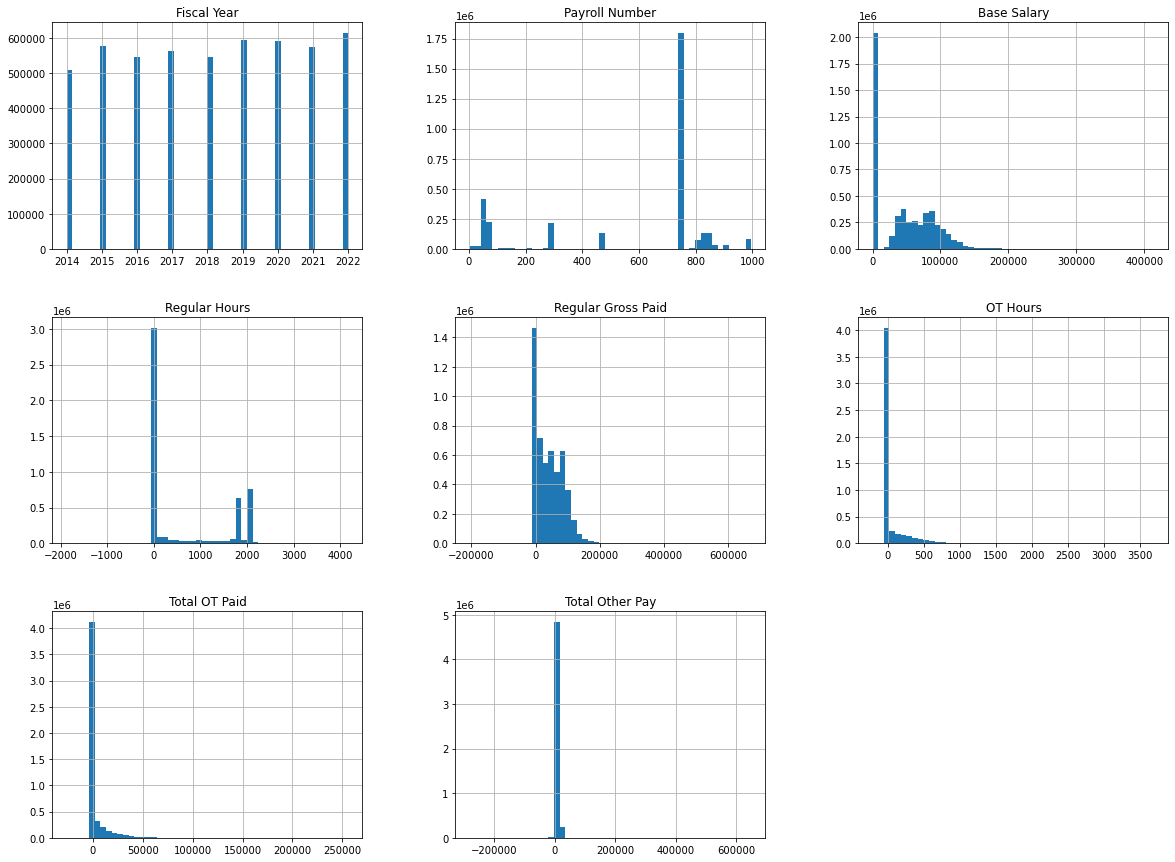

In [10]:
df.hist(bins=50, figsize=(20,15))

In [11]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols

,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Pay Basis
0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,per Annum
1,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,per Annum
2,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,per Annum
3,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,per Annum
4,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,per Annum
...,...,...,...,...,...,...,...,...,...
5109770,OFFICE OF THE MAYOR,ZHANG,JIN,NaN,12/09/2019,MANHATTAN,Senior Project Planner,CEASED,per Annum
5109771,OFFICE OF THE MAYOR,ZHAO,XIAOMIN,NaN,09/04/2018,MANHATTAN,SPECIAL ASSISTANT,CEASED,per Annum
5109772,OFFICE OF THE MAYOR,ZHENG,SANDY,NaN,06/08/2022,MANHATTAN,SUMMER COLLEGE INTERN,ACTIVE,per Hour
5109773,OFFICE OF THE MAYOR,ZHOU,DIANE,J,11/13/2017,MANHATTAN,MAYORAL OFFICE ASSISTANT,ACTIVE,per Annum


In [12]:
df.sort_values(by=['Fiscal Year'])

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
2554887,2014,745.0,DEPT OF ED HRLY SUPPORT STAFF,PARISI,ROBYNE,NaN,03/11/1996,NaN,F/T SCHOOL AIDE,ACTIVE,14.57,per Hour,0.0,22661.59,0.0,0.0,0.00
2458254,2014,742.0,DEPT OF ED PEDAGOGICAL,CROWLEY,KARIN,L,09/08/1998,NaN,TEACHER,ACTIVE,72990.00,per Annum,0.0,71433.16,0.0,0.0,1000.00
2458255,2014,742.0,DEPT OF ED PEDAGOGICAL,DI FIORE,DENISE,NaN,09/08/1998,NaN,TEACHER,ACTIVE,72990.00,per Annum,0.0,73025.29,0.0,0.0,1000.00
2458256,2014,742.0,DEPT OF ED PEDAGOGICAL,DISTEFANO,CHRISTINE,NaN,09/08/1998,NaN,TEACHER,ACTIVE,72990.00,per Annum,0.0,72680.06,0.0,0.0,1000.00
2458257,2014,742.0,DEPT OF ED PEDAGOGICAL,EDGHILL,LETICIA,Y,09/08/1998,NaN,TEACHER,ACTIVE,72990.00,per Annum,0.0,73731.09,0.0,0.0,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701103,2022,747.0,DEPT OF ED PER SESSION TEACHER,ZINEELABIDINE,HASSAN,NaN,02/14/2012,MANHATTAN,SCHOOL SECRETARY PER SESSION,ACTIVE,20.45,per Day,0.0,2108.29,0.0,0.0,4.10
4701104,2022,747.0,DEPT OF ED PER SESSION TEACHER,ZINGMAN,MARCY,H,10/10/2019,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,1418.85,0.0,0.0,0.11
4701105,2022,747.0,DEPT OF ED PER SESSION TEACHER,ZINGMAN,NICOLE,NaN,09/05/2017,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,58.48,0.0,0.0,0.00
4701107,2022,747.0,DEPT OF ED PER SESSION TEACHER,ZINK,JUDITH,B,09/02/1997,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.0,5937.84,0.0,0.0,0.79


In [13]:
df['Work Location Borough'].value_counts()

MANHATTAN        3263896
QUEENS            500733
BROOKLYN          423642
BRONX             232788
OTHER             107514
RICHMOND           61362
WESTCHESTER         4513
ULSTER              2602
Manhattan           1622
SULLIVAN            1079
Bronx                935
DELAWARE             717
Queens               660
NASSAU               326
PUTNAM               323
SCHOHARIE            233
DUTCHESS             199
ALBANY               124
Richmond             112
GREENE                80
WASHINGTON DC         59
ORANGE                24
Name: Work Location Borough, dtype: int64

In [14]:
df['Agency Name'].value_counts()

DEPT OF ED PEDAGOGICAL            992336
DEPT OF ED PER SESSION TEACHER    827739
POLICE DEPARTMENT                 487558
DEPT OF ED PARA PROFESSIONALS     331813
BOARD OF ELECTION POLL WORKERS    314557
                                   ...  
BRONX COMMUNITY BOARD #12             24
BRONX COMMUNITY BOARD #1              19
BRONX COMMUNITY BOARD #3              18
BOARD OF CORRECTIONS                  17
DISTRICTING COMMISSION                12
Name: Agency Name, Length: 166, dtype: int64

In [15]:
len(df['Agency Name'].value_counts())

166

In [16]:
df['Agency Name'][:10]

0    OFFICE OF EMERGENCY MANAGEMENT
1    OFFICE OF EMERGENCY MANAGEMENT
2    OFFICE OF EMERGENCY MANAGEMENT
3    OFFICE OF EMERGENCY MANAGEMENT
4    OFFICE OF EMERGENCY MANAGEMENT
5    OFFICE OF EMERGENCY MANAGEMENT
6    OFFICE OF EMERGENCY MANAGEMENT
7    OFFICE OF EMERGENCY MANAGEMENT
8    OFFICE OF EMERGENCY MANAGEMENT
9    OFFICE OF EMERGENCY MANAGEMENT
Name: Agency Name, dtype: object

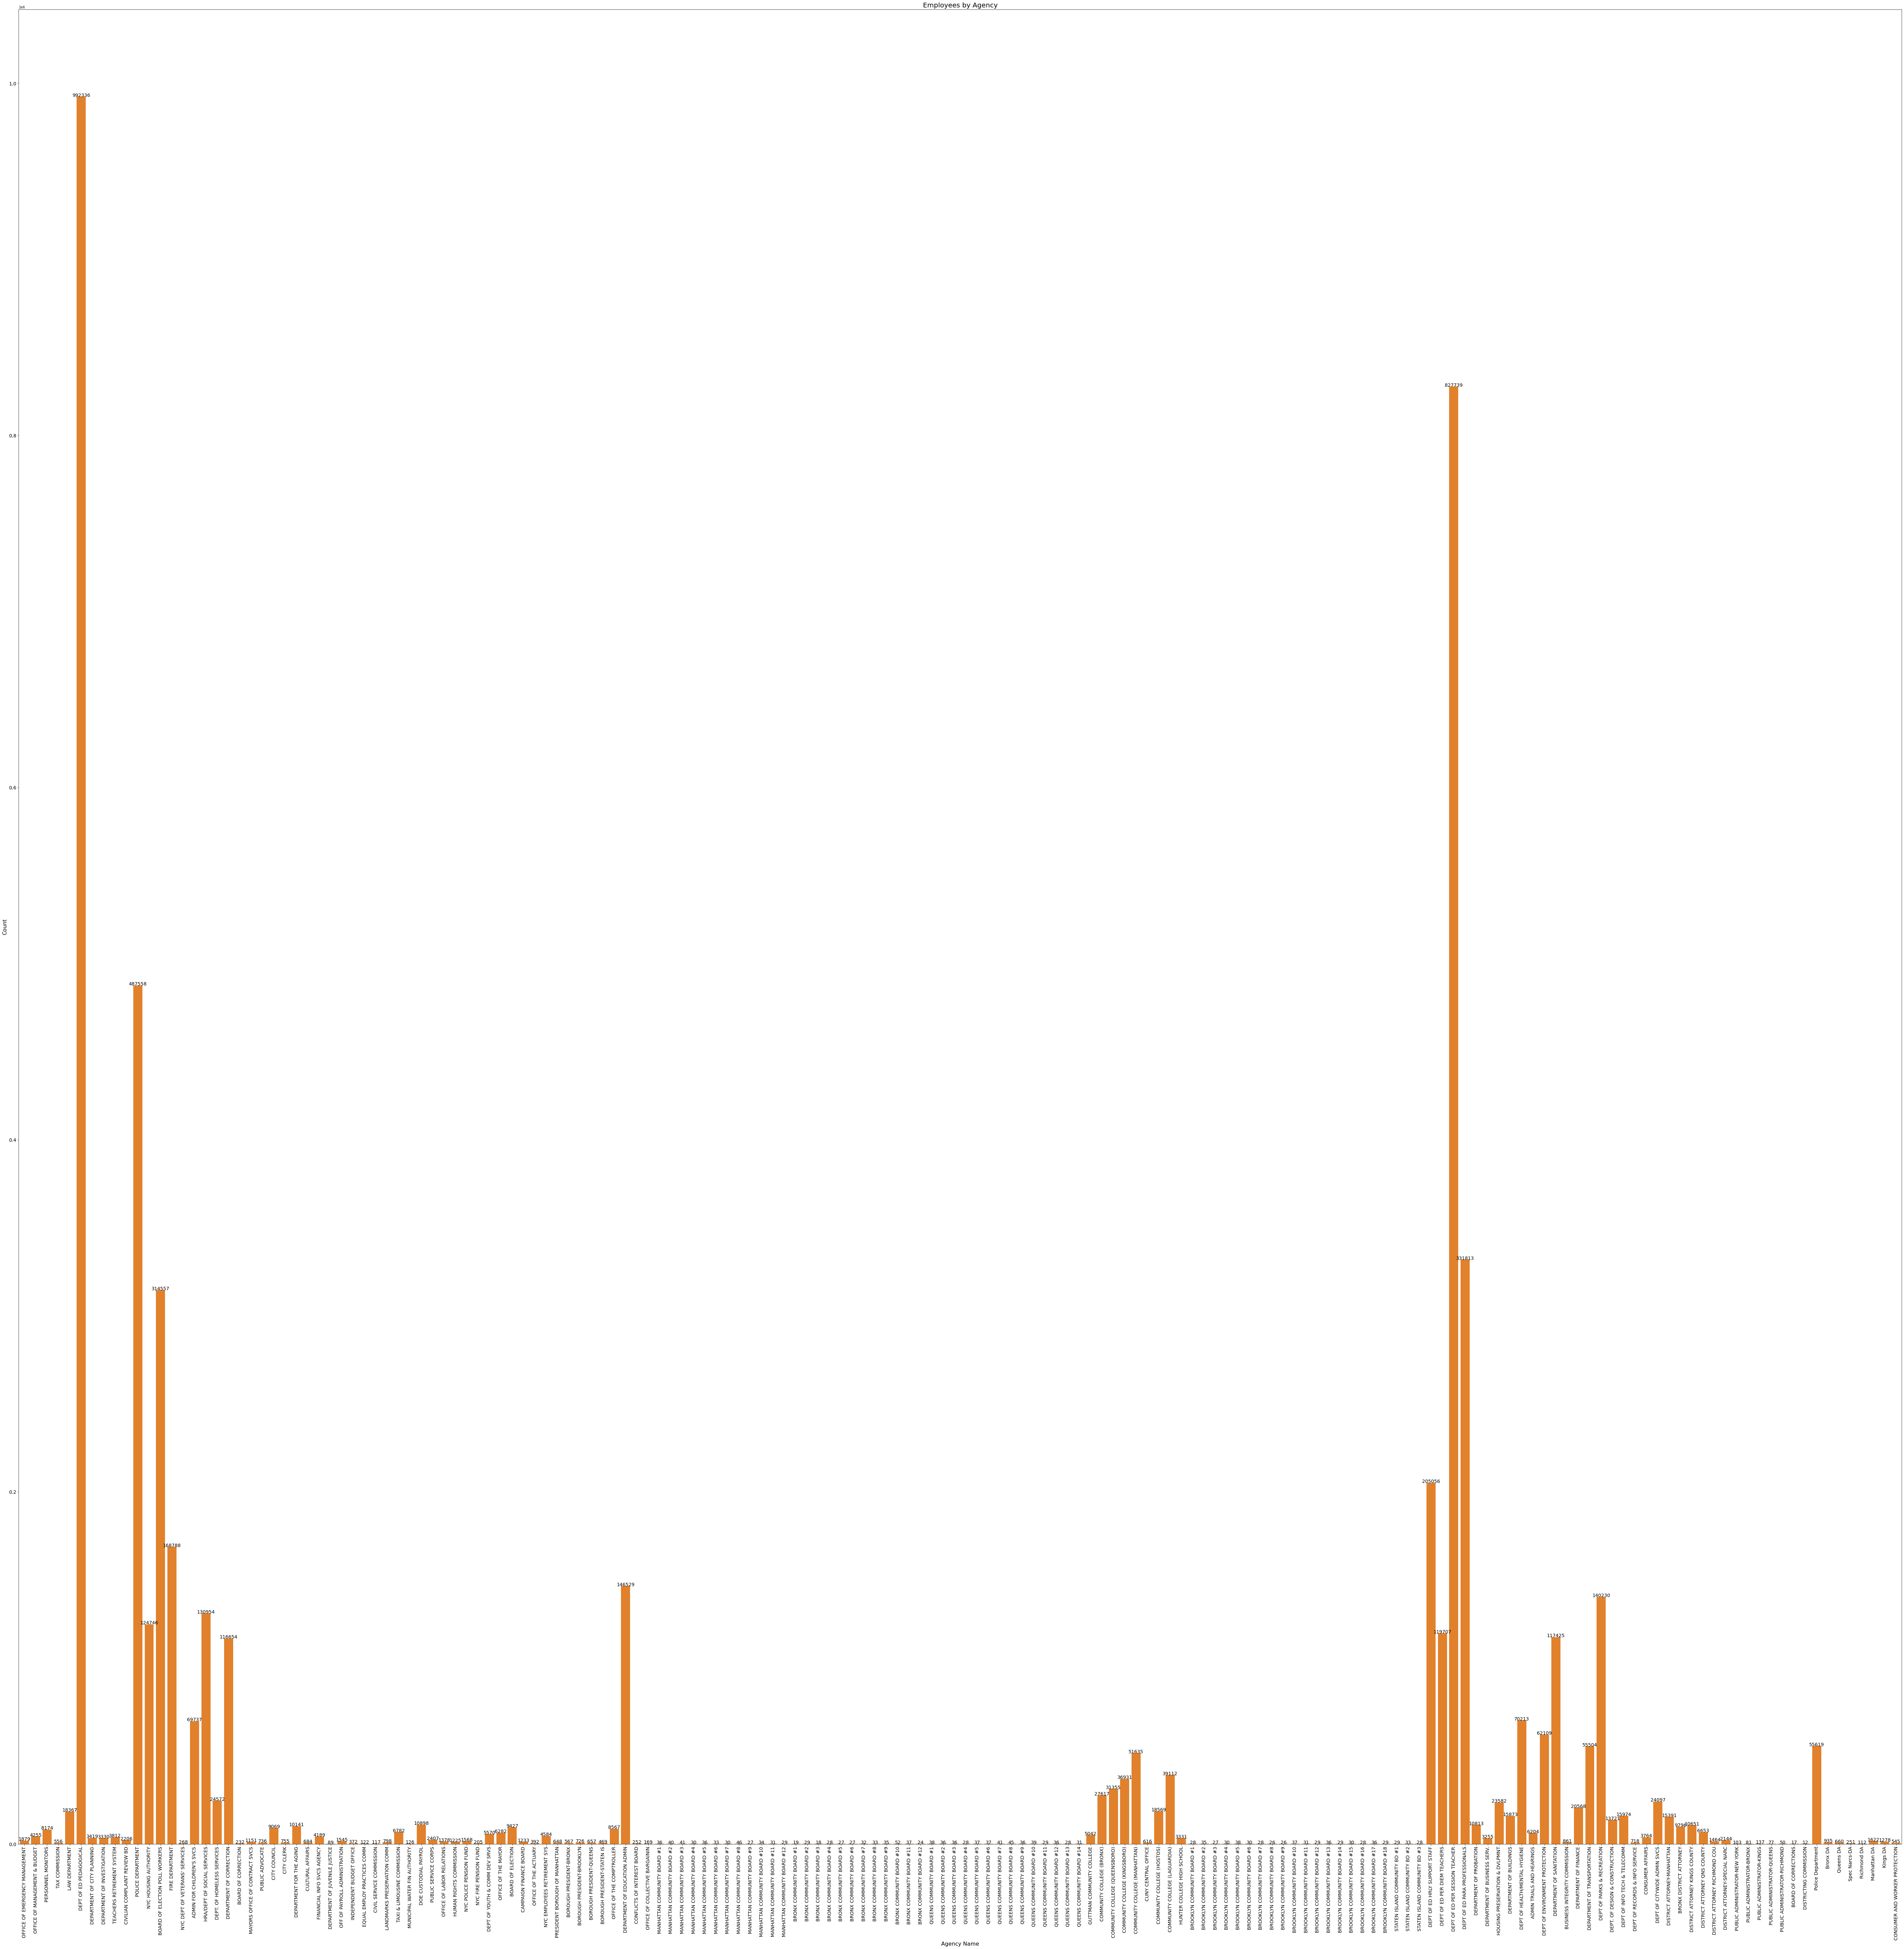

In [17]:
plt.figure(figsize=(100, 100))
base_color=sns.color_palette()[1]
sns.countplot(data=df, x='Agency Name',color=base_color)
plt.title('Employees by Agency',fontsize=20)
plt.xlabel('Agency Name', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = df['Agency Name'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+20, pct_string, ha = 'center', color = 'black', fontsize=14)


In [18]:
len(df['Agency Name'].unique())

166

In [19]:
remove_cols = ['Payroll Number','Last Name','First Name','Mid Init','Agency Start Date', 'Title Description', 'Work Location Borough']
k = df.drop(remove_cols, axis=1)

In [20]:
print(k.isnull().sum())

Fiscal Year                   0
Agency Name                   0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64


In [21]:
df

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109770,2022,2.0,OFFICE OF THE MAYOR,ZHANG,JIN,NaN,12/09/2019,MANHATTAN,Senior Project Planner,CEASED,110000.00,per Annum,49.00,2953.16,0.0,0.0,1883.56
5109771,2022,2.0,OFFICE OF THE MAYOR,ZHAO,XIAOMIN,NaN,09/04/2018,MANHATTAN,SPECIAL ASSISTANT,CEASED,71974.00,per Annum,980.00,38649.10,0.0,0.0,0.00
5109772,2022,2.0,OFFICE OF THE MAYOR,ZHENG,SANDY,NaN,06/08/2022,MANHATTAN,SUMMER COLLEGE INTERN,ACTIVE,15.75,per Hour,22.25,350.44,0.0,0.0,0.00
5109773,2022,2.0,OFFICE OF THE MAYOR,ZHOU,DIANE,J,11/13/2017,MANHATTAN,MAYORAL OFFICE ASSISTANT,ACTIVE,50000.00,per Annum,1820.00,49863.06,0.0,0.0,0.00


In [22]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109775 entries, 0 to 5109774
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Agency Name                 object 
 2   Leave Status as of June 30  object 
 3   Base Salary                 float64
 4   Pay Basis                   object 
 5   Regular Hours               float64
 6   Regular Gross Paid          float64
 7   OT Hours                    float64
 8   Total OT Paid               float64
 9   Total Other Pay             float64
dtypes: float64(6), int64(1), object(3)
memory usage: 389.8+ MB


In [23]:
k['Agency Name'].value_counts()

DEPT OF ED PEDAGOGICAL            992336
DEPT OF ED PER SESSION TEACHER    827739
POLICE DEPARTMENT                 487558
DEPT OF ED PARA PROFESSIONALS     331813
BOARD OF ELECTION POLL WORKERS    314557
                                   ...  
BRONX COMMUNITY BOARD #12             24
BRONX COMMUNITY BOARD #1              19
BRONX COMMUNITY BOARD #3              18
BOARD OF CORRECTIONS                  17
DISTRICTING COMMISSION                12
Name: Agency Name, Length: 166, dtype: int64

In [24]:
k['Pay Basis'].value_counts()

per Annum          3045870
per Day            1164774
per Hour            876614
Prorated Annual      22517
Name: Pay Basis, dtype: int64

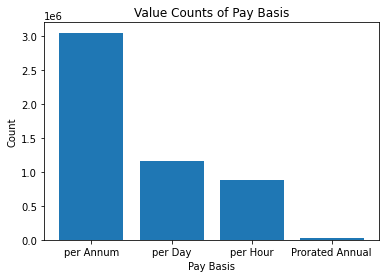

In [25]:
import matplotlib.pyplot as plt

value_counts = k['Pay Basis'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Pay Basis')
plt.ylabel('Count')
plt.title('Value Counts of Pay Basis')
plt.show()


In [26]:
k['Leave Status as of June 30'].value_counts()

ACTIVE                 4314003
CEASED                  685420
ON LEAVE                 58508
SEASONAL                 42578
ON SEPARATION LEAVE       9266
Name: Leave Status as of June 30, dtype: int64

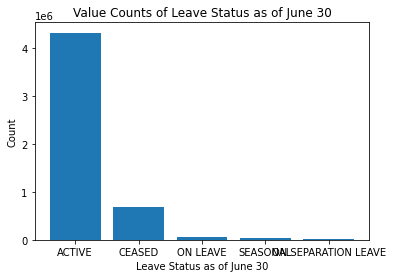

In [27]:
import matplotlib.pyplot as plt

value_counts = k['Leave Status as of June 30'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Leave Status as of June 30')
plt.ylabel('Count')
plt.title('Value Counts of Leave Status as of June 30')
plt.show()


In [28]:
k

,Fiscal Year,Agency Name,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,ACTIVE,86005.00,per Annum,1820.00,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
5109770,2022,OFFICE OF THE MAYOR,CEASED,110000.00,per Annum,49.00,2953.16,0.0,0.0,1883.56
5109771,2022,OFFICE OF THE MAYOR,CEASED,71974.00,per Annum,980.00,38649.10,0.0,0.0,0.00
5109772,2022,OFFICE OF THE MAYOR,ACTIVE,15.75,per Hour,22.25,350.44,0.0,0.0,0.00
5109773,2022,OFFICE OF THE MAYOR,ACTIVE,50000.00,per Annum,1820.00,49863.06,0.0,0.0,0.00


In [29]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in k.columns.values:
    if k[col].dtypes=='object':
        k[col]=le.fit_transform(k[col])

In [30]:
k

,Fiscal Year,Agency Name,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
1,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
2,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
3,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
4,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
5109770,2022,131,1,110000.00,1,49.00,2953.16,0.0,0.0,1883.56
5109771,2022,131,1,71974.00,1,980.00,38649.10,0.0,0.0,0.00
5109772,2022,131,0,15.75,3,22.25,350.44,0.0,0.0,0.00
5109773,2022,131,0,50000.00,1,1820.00,49863.06,0.0,0.0,0.00


In [31]:
from sklearn.preprocessing import StandardScaler
import pandas as pd



# initialize the StandardScaler object
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(k)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=k.columns)

print(df_scaled)

         Fiscal Year  Agency Name  Leave Status as of June 30  Base Salary  \
0           0.736147     1.599570                   -0.362835     0.970085   
1           0.736147     1.599570                   -0.362835     0.970085   
2           0.736147     1.599570                   -0.362835     0.970085   
3           0.736147     1.599570                   -0.362835     0.970085   
4           0.736147     1.599570                   -0.362835     0.970085   
...              ...          ...                         ...          ...   
5109770     1.511893     1.762657                    1.490158     1.528770   
5109771     1.511893     1.762657                    1.490158     0.643396   
5109772     1.511893     1.762657                   -0.362835    -1.032036   
5109773     1.511893     1.762657                   -0.362835     0.131767   
5109774     1.511893     1.762657                    1.490158     0.760418   

         Pay Basis  Regular Hours  Regular Gross Paid  OT Hours

In [32]:
k

,Fiscal Year,Agency Name,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
1,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
2,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
3,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
4,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
5109770,2022,131,1,110000.00,1,49.00,2953.16,0.0,0.0,1883.56
5109771,2022,131,1,71974.00,1,980.00,38649.10,0.0,0.0,0.00
5109772,2022,131,0,15.75,3,22.25,350.44,0.0,0.0,0.00
5109773,2022,131,0,50000.00,1,1820.00,49863.06,0.0,0.0,0.00


array([[<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Payroll Number'}>,
        <AxesSubplot:title={'center':'Base Salary'}>],
       [<AxesSubplot:title={'center':'Regular Hours'}>,
        <AxesSubplot:title={'center':'Regular Gross Paid'}>,
        <AxesSubplot:title={'center':'OT Hours'}>],
       [<AxesSubplot:title={'center':'Total OT Paid'}>,
        <AxesSubplot:title={'center':'Total Other Pay'}>, <AxesSubplot:>]],
      dtype=object)

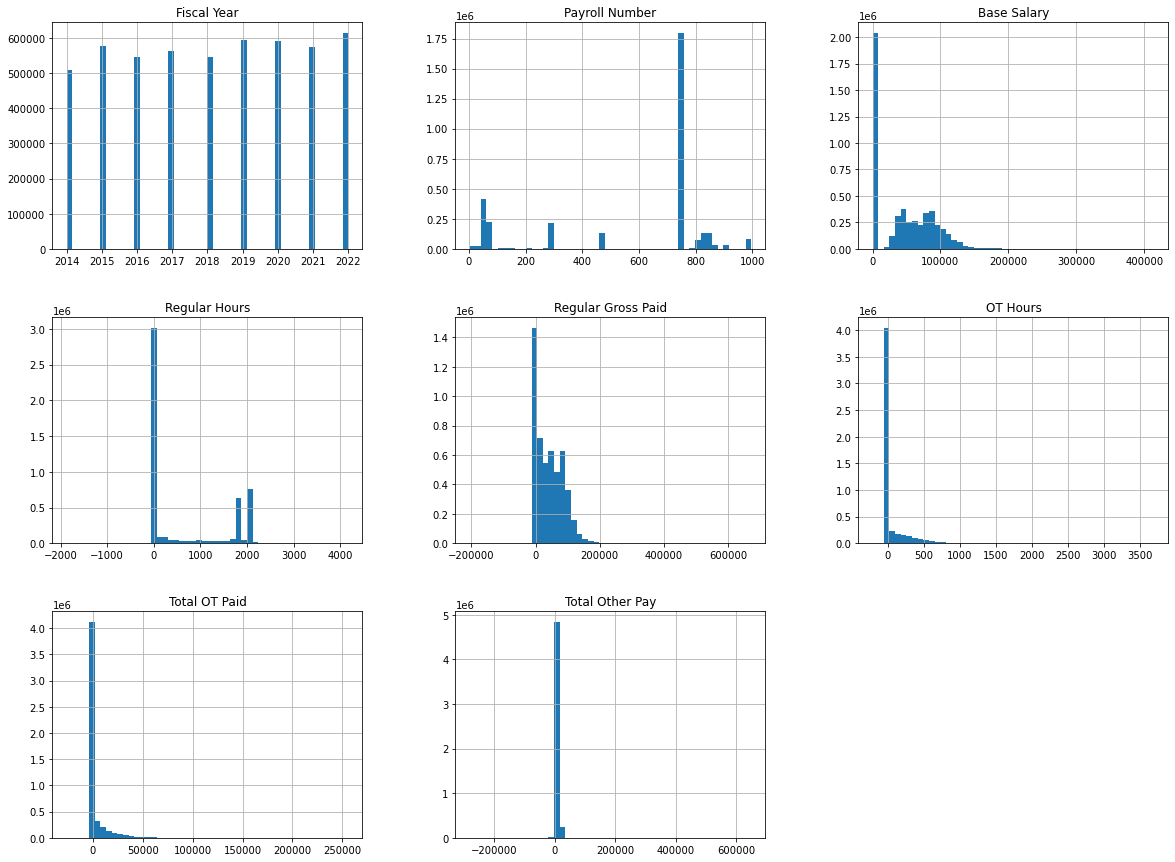

In [33]:
df.hist(bins=50, figsize=(20,15))

In [34]:
k.columns

Index(['Fiscal Year', 'Agency Name', 'Leave Status as of June 30',
       'Base Salary', 'Pay Basis', 'Regular Hours', 'Regular Gross Paid',
       'OT Hours', 'Total OT Paid', 'Total Other Pay'],
      dtype='object')

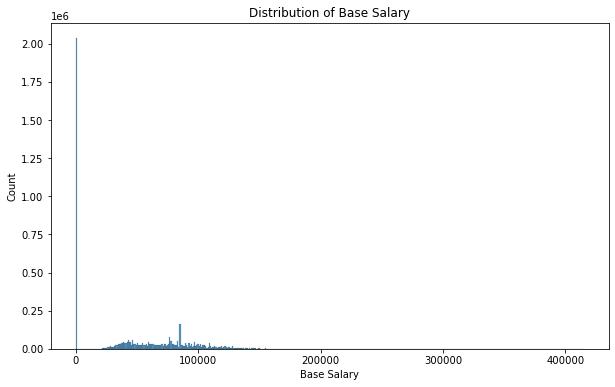

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram or box plot of Base Salary
plt.figure(figsize=(10,6))
sns.histplot(df['Base Salary'], kde=False)
plt.title('Distribution of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Count')
plt.show()

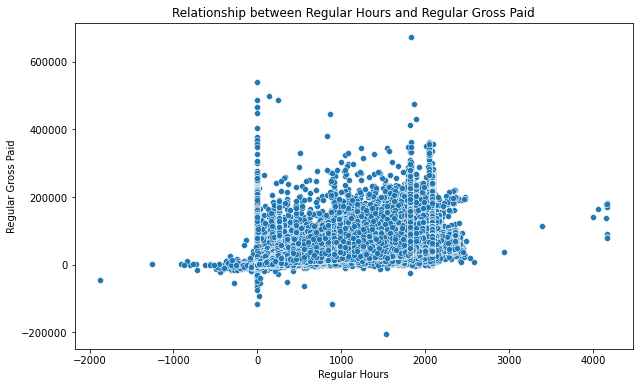

In [36]:

# Scatter plot of Regular Gross Paid vs. Regular Hours
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Regular Hours', y='Regular Gross Paid')
plt.title('Relationship between Regular Hours and Regular Gross Paid')
plt.xlabel('Regular Hours')
plt.ylabel('Regular Gross Paid')
plt.show()

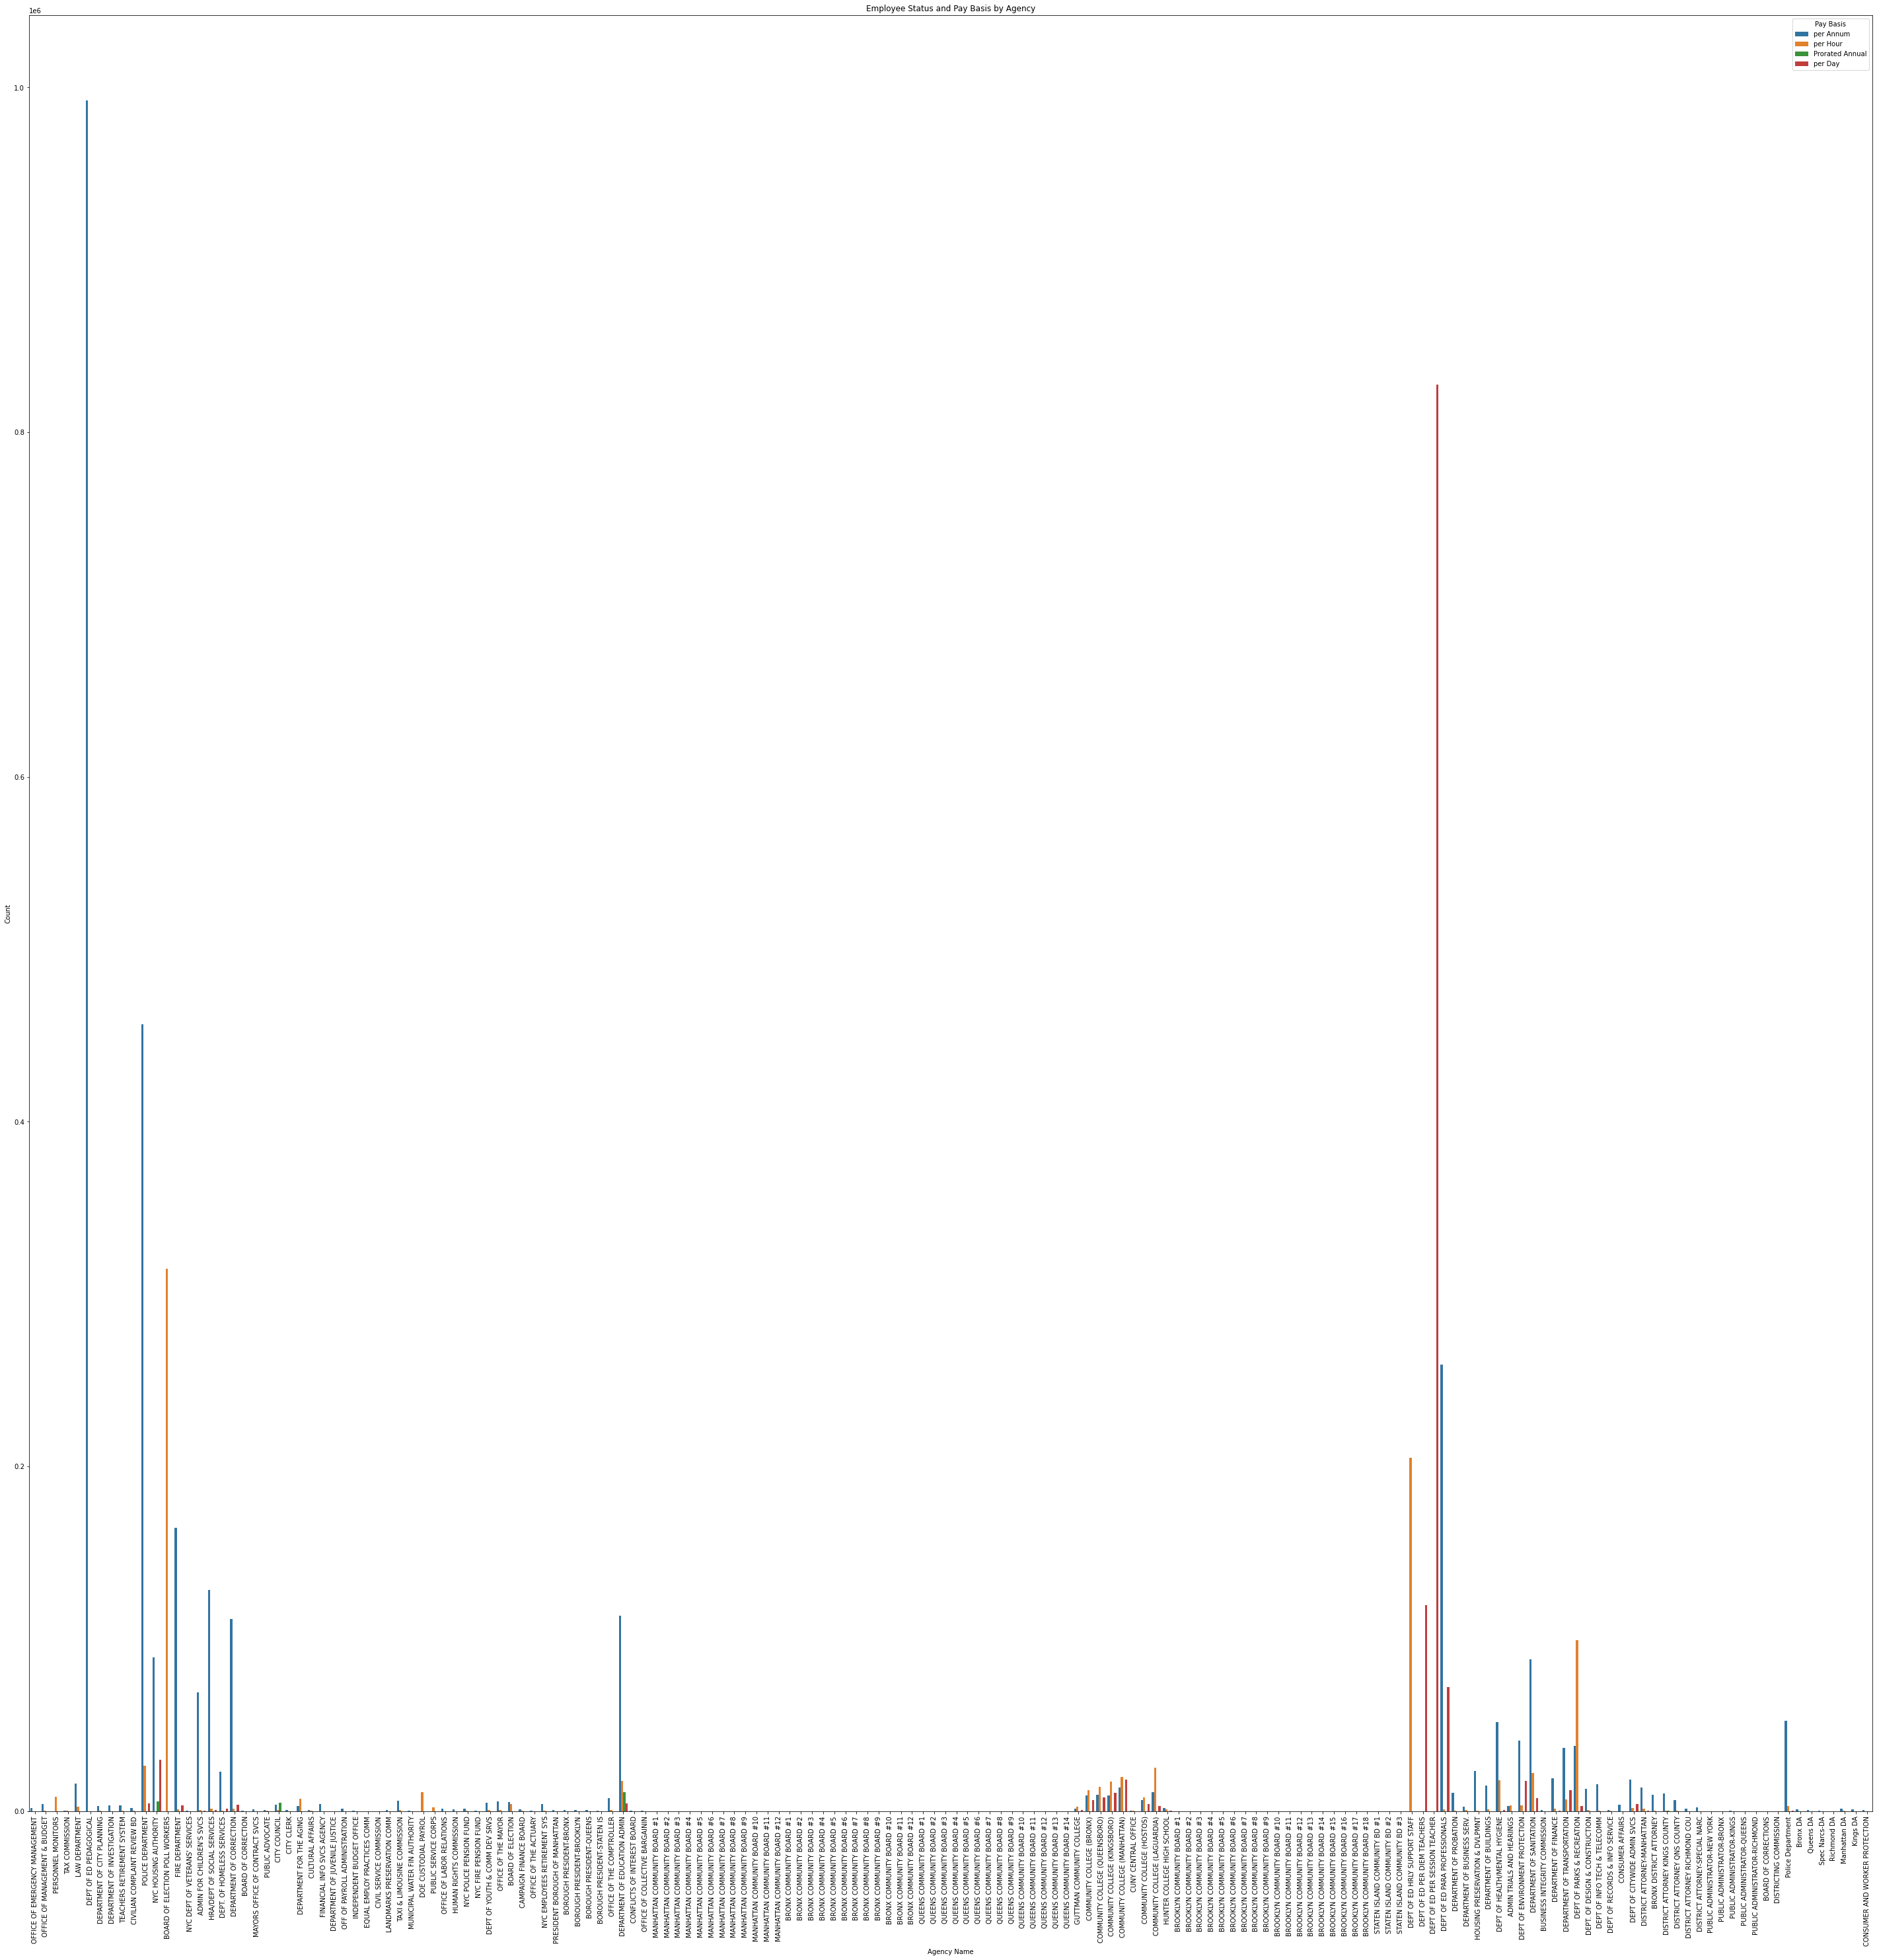

In [37]:
# Stacked bar chart of Pay Basis and Leave Status as of June 30
plt.figure(figsize=(50,50))
sns.countplot(data=df, x='Agency Name', hue='Pay Basis')
plt.title('Employee Status and Pay Basis by Agency')
plt.xlabel('Agency Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


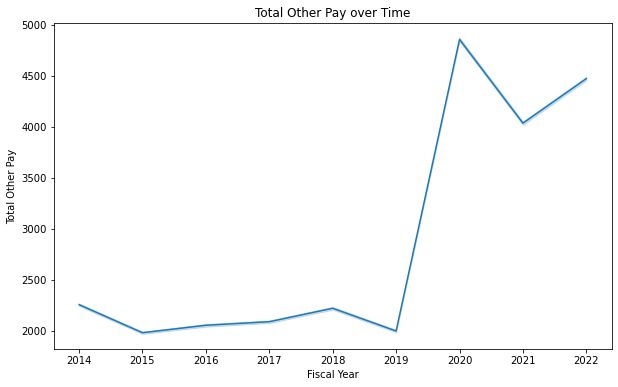

In [38]:
# Line chart of Total Other Pay over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Fiscal Year', y='Total Other Pay')
plt.title('Total Other Pay over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Other Pay')
plt.show()


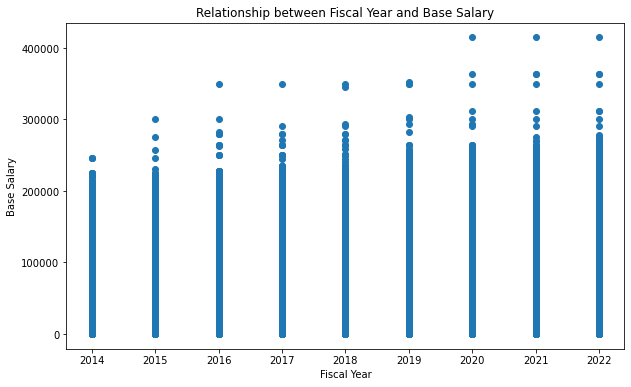

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Fiscal Year'], df['Base Salary'])
plt.xlabel('Fiscal Year')
plt.ylabel('Base Salary')
plt.title('Relationship between Fiscal Year and Base Salary')
plt.show()




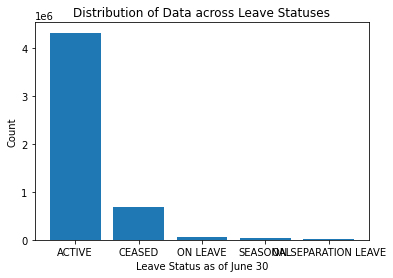

In [40]:
#Bar Plot for 'Leave Status as of June 30' Column
import matplotlib.pyplot as plt

value_counts = df['Leave Status as of June 30'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Leave Status as of June 30')
plt.ylabel('Count')
plt.title('Distribution of Data across Leave Statuses')
plt.show()


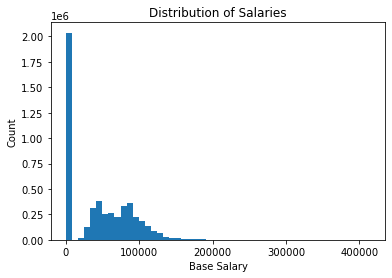

In [41]:
#Histogram for 'Base Salary' Column
import matplotlib.pyplot as plt

plt.hist(df['Base Salary'], bins=50)
plt.xlabel('Base Salary')
plt.ylabel('Count')
plt.title('Distribution of Salaries')
plt.show()


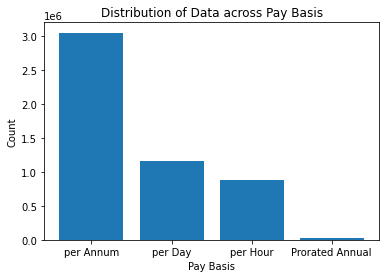

In [42]:
#Bar Plot for 'Pay Basis' Column
import matplotlib.pyplot as plt

value_counts = df['Pay Basis'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Pay Basis')
plt.ylabel('Count')
plt.title('Distribution of Data across Pay Basis')
plt.show()


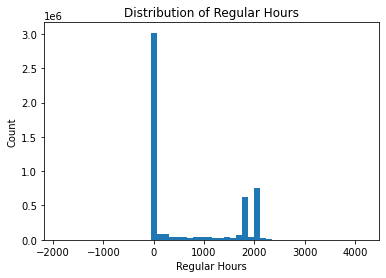

In [43]:
#Histogram for 'Regular Hours' Column
import matplotlib.pyplot as plt

plt.hist(df['Regular Hours'], bins=50)
plt.xlabel('Regular Hours')
plt.ylabel('Count')
plt.title('Distribution of Regular Hours')
plt.show()


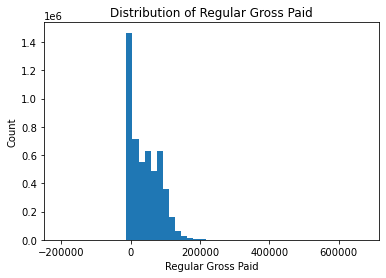

In [44]:
#Histogram for 'Regular Gross Paid' Column
import matplotlib.pyplot as plt

plt.hist(df['Regular Gross Paid'], bins=50)
plt.xlabel('Regular Gross Paid')
plt.ylabel('Count')
plt.title('Distribution of Regular Gross Paid')
plt.show()


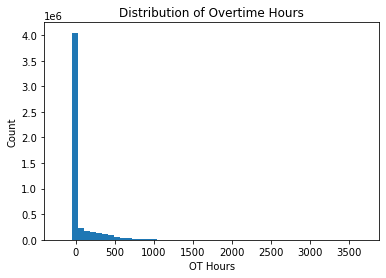

In [45]:
#Histogram for 'OT Hours' Column
import matplotlib.pyplot as plt

plt.hist(df['OT Hours'], bins=50)
plt.xlabel('OT Hours')
plt.ylabel('Count')
plt.title('Distribution of Overtime Hours')
plt.show()


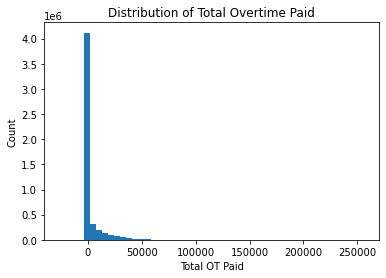

In [46]:
#Histogram for 'Total OT Paid' Column
import matplotlib.pyplot as plt

plt.hist(df['Total OT Paid'], bins=50)
plt.xlabel('Total OT Paid')
plt.ylabel('Count')
plt.title('Distribution of Total Overtime Paid')
plt.show()


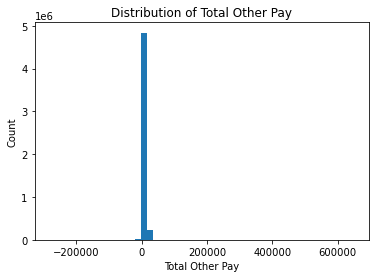

In [47]:
#Histogram for 'Total Other Pay' Column
import matplotlib.pyplot as plt

plt.hist(df['Total Other Pay'], bins=50)
plt.xlabel('Total Other Pay')
plt.ylabel('Count')
plt.title('Distribution of Total Other Pay')
plt.show()


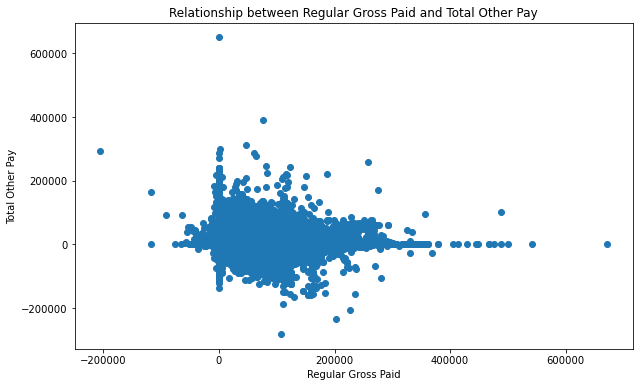

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Regular Gross Paid'], df['Total Other Pay'])
plt.xlabel('Regular Gross Paid')
plt.ylabel('Total Other Pay')
plt.title('Relationship between Regular Gross Paid and Total Other Pay')
plt.show()


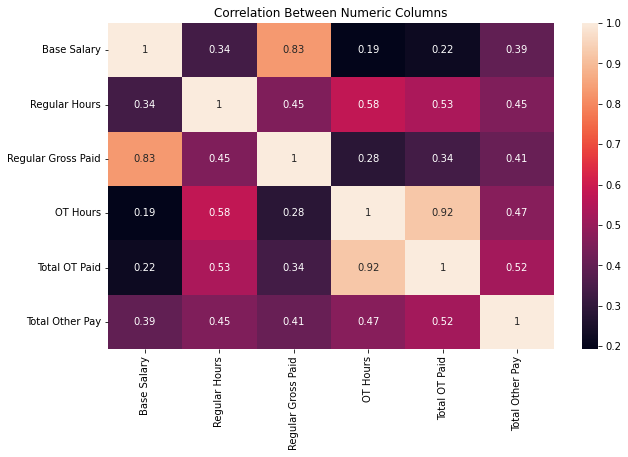

In [49]:
#Heatmap of correlation between numeric columns:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Base Salary', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid', 'Total Other Pay']].corr(), annot=True)
plt.title('Correlation Between Numeric Columns')
plt.show()


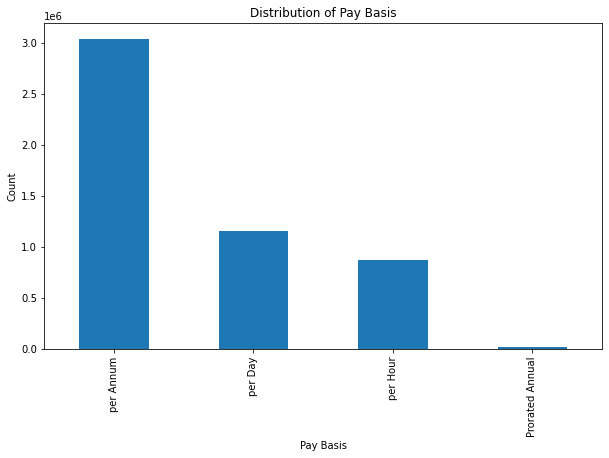

In [50]:
#Bar chart of pay basis counts:
#Understand the distribution of pay basis:
plt.figure(figsize=(10, 6))
df['Pay Basis'].value_counts().plot(kind='bar')
plt.xlabel('Pay Basis')
plt.ylabel('Count')
plt.title('Distribution of Pay Basis')
plt.show()


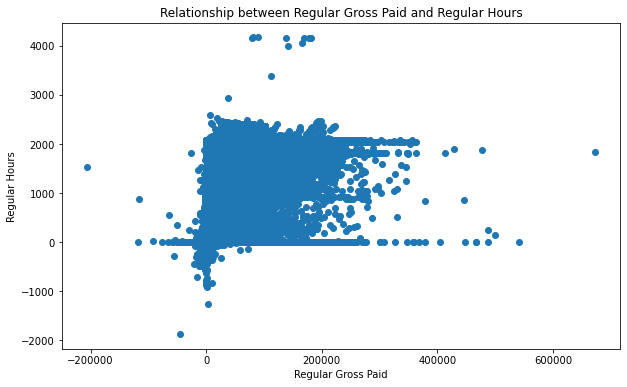

In [51]:
#Exploring the relationship between pay and hours worked:
plt.figure(figsize=(10, 6))
plt.scatter(df['Regular Gross Paid'], df['Regular Hours'])
plt.xlabel('Regular Gross Paid')
plt.ylabel('Regular Hours')
plt.title('Relationship between Regular Gross Paid and Regular Hours')
plt.show()


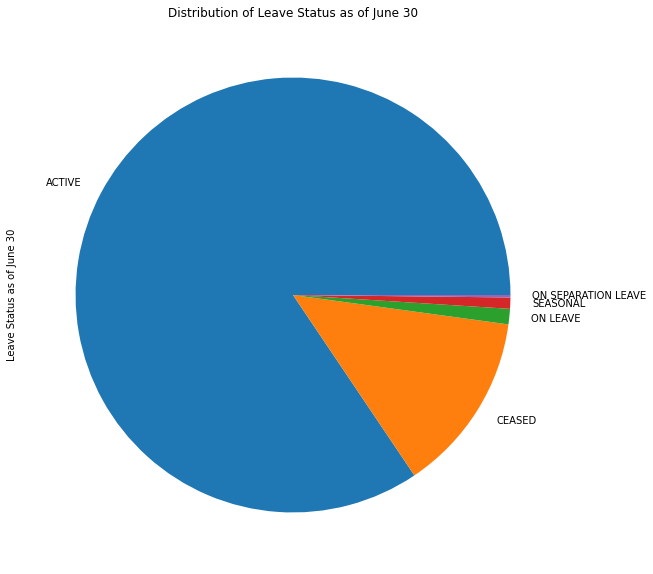

In [52]:
#Analyze leave status as of June 30:
plt.figure(figsize=(20, 10))
df['Leave Status as of June 30'].value_counts().plot(kind='pie')
plt.title('Distribution of Leave Status as of June 30')
plt.show()


In [53]:
k

,Fiscal Year,Agency Name,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
1,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
2,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
3,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
4,2020,126,0,86005.00,1,1820.00,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
5109770,2022,131,1,110000.00,1,49.00,2953.16,0.0,0.0,1883.56
5109771,2022,131,1,71974.00,1,980.00,38649.10,0.0,0.0,0.00
5109772,2022,131,0,15.75,3,22.25,350.44,0.0,0.0,0.00
5109773,2022,131,0,50000.00,1,1820.00,49863.06,0.0,0.0,0.00


In [54]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# load data
data = df_scaled

# calculate correlation matrix
corr_matrix = data.corr()
print("corr_matrix",corr_matrix)
# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
print("upper ",upper )
# find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print("to_drop",to_drop)
# drop correlated features
data = data.drop(to_drop, axis=1)
print("data",data)
# apply SelectKBest class to extract top 5 best features
best_features = SelectKBest(score_func=f_regression, k=5)
print("best_features",best_features)


# Define the features and target variable
X = data.drop(['Base Salary'], axis=1)  # features
y = data['Base Salary']  # target variable

fit = best_features.fit(X, y)

# summarize scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

# concatenate selected features
selected_features = pd.concat([columns, scores], axis=1)
selected_features.columns = ['Feature', 'Score']

# print selected features
print(selected_features.nlargest(5, 'Score'))


corr_matrix                             Fiscal Year  Agency Name  \
Fiscal Year                    1.000000    -0.018342   
Agency Name                   -0.018342     1.000000   
Leave Status as of June 30     0.035885     0.007069   
Base Salary                    0.073928     0.267055   
Pay Basis                     -0.017997    -0.410751   
Regular Hours                 -0.014535     0.409239   
Regular Gross Paid             0.046477     0.262281   
OT Hours                       0.030509     0.275634   
Total OT Paid                  0.018097     0.262705   
Total Other Pay                0.149841     0.302670   

                            Leave Status as of June 30  Base Salary  \
Fiscal Year                                   0.035885     0.073928   
Agency Name                                   0.007069     0.267055   
Leave Status as of June 30                    1.000000    -0.056223   
Base Salary                                  -0.056223     1.000000   
Pay Basis       

In [55]:
y

0          0.970085
1          0.970085
2          0.970085
3          0.970085
4          0.970085
             ...   
5109770    1.528770
5109771    0.643396
5109772   -1.032036
5109773    0.131767
5109774    0.760418
Name: Base Salary, Length: 5109775, dtype: float64

In [56]:

from sklearn.model_selection import train_test_split

X = X[['Pay Basis', 'Regular Hours', 'Agency Name']]
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [58]:
#he performance of regression models is typically evaluated using metrics such as mean squared error (MSE), mean absolute error (MAE), and coefficient of determination (R-squared).
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_reg.predict(X_train)
y_pred_val = rf_reg.predict(X_val)
y_pred_test = rf_reg.predict(X_test)

# Evaluate the model
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)


# Print the evaluation metrics
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Validation: {rmse_val:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")






RMSE Train: 0.42
RMSE Validation: 0.44
RMSE Test: 0.44


In [59]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



# make predictions on the testing set
y_pred = rf_reg.predict(X_test)

# calculate the MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.24642639315895246
R-squared (R2): 0.806204473538322


In [60]:
#using Gradient boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

y_pred_train_gb = gb_reg.predict(X_train)
y_pred_val_gb = gb_reg.predict(X_val)
y_pred_test_gb = gb_reg.predict(X_test)

rmse_train_gb = mean_squared_error(y_train, y_pred_train_gb, squared=False)
rmse_val_gb = mean_squared_error(y_val, y_pred_val_gb, squared=False)
rmse_test_gb = mean_squared_error(y_test, y_pred_test_gb, squared=False)







In [61]:
# Print the evaluation metrics for Gradient Boositing
print("Gradient Boositing:")
print(f"RMSE Train: {rmse_train_gb:.2f}")
print(f"RMSE Validation: {rmse_val_gb:.2f}")
print(f"RMSE Test: {rmse_test_gb:.2f}")





Gradient Boositing:
RMSE Train: 0.45
RMSE Validation: 0.45
RMSE Test: 0.45


In [62]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



# make predictions on the testing set
y_pred = gb_reg.predict(X_test)

# calculate the MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.26952345107863007
R-squared (R2): 0.7935046990127494


In [63]:

#using Linear Regression
from sklearn.linear_model import LinearRegression

# Instantiate the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_pred_train_lr = lin_reg.predict(X_train)
y_pred_val_lr = lin_reg.predict(X_val)
y_pred_test_lr = lin_reg.predict(X_test)



# Calculate evaluation metrics for linear regression
rmse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
rmse_val_lr = mean_squared_error(y_val, y_pred_val_lr)
rmse_test_lr = mean_squared_error(y_test, y_pred_test_lr)







# Print the evaluation metrics for linear regression
print("Linear Regression:")
print(f"RMSE Train: {rmse_train_lr:.2f}")
print(f"RMSE Validation: {rmse_val_lr:.2f}")
print(f"RMSE Test: {rmse_test_lr:.2f}")






Linear Regression:
RMSE Train: 0.43
RMSE Validation: 0.43
RMSE Test: 0.43


In [64]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd



# make predictions on the testing set
y_pred = lin_reg.predict(X_test)

# calculate the MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.5434773104604573
R-squared (R2): 0.5712085575437018


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#voting regressor

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create three different regression models
model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=4)
model3 = RandomForestRegressor(n_estimators=100)

# Define the voting regressor
voting_reg = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('rf', model3)])

# Fit the model on the training data
voting_reg.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = voting_reg.predict(X_train)
y_val_pred = voting_reg.predict(X_val)
y_test_pred = voting_reg.predict(X_test)

# Calculate RMSE for training, validation, and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)



# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)
print("Result of Voting Regressor I")
# Print the results
print("RMSE (Train):", rmse_train)
print("RMSE (Validation):", rmse_val)
print("RMSE (Test):", rmse_test)

print("MAE (Test):", mae_test)
print("R-squared (Test):", r2_test)


Result of Voting Regressor I
RMSE (Train): 0.4705440150914606
RMSE (Validation): 0.47575182479420236
RMSE (Test): 0.4765052068796502
MAE (Test): 0.3383908064762895
R-squared (Test): 0.7730571173996758


In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Create the voting regressor
voting_reg_2 = VotingRegressor(estimators=[('rf', RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1)),
                                         ('neigh', KNeighborsRegressor(n_neighbors=2)),
                                         ('et', ExtraTreesRegressor(max_depth=10, random_state=1)),
                                         ('gb', GradientBoostingRegressor(max_depth=10, random_state=1))],
                              weights=[1, 2, 1, 1])

# Fit the model on the training data
voting_reg_2.fit(X_train, y_train)



VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=50,
                                                   random_state=1)),
                            ('neigh', KNeighborsRegressor(n_neighbors=2)),
                            ('et',
                             ExtraTreesRegressor(max_depth=10, random_state=1)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=10,
                                                       random_state=1))],
                weights=[1, 2, 1, 1])

In [69]:
# Make predictions on the training, validation, and test sets
y_train_pred = voting_reg_2.predict(X_train)
y_val_pred = voting_reg_2.predict(X_val)
y_test_pred = voting_reg_2.predict(X_test)

# Calculate RMSE for training, validation, and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)
print("Result of Voting Regressor II")
# Print the results
print("RMSE (Train):", rmse_train)
print("RMSE (Validation):", rmse_val)
print("RMSE (Test):", rmse_test)

print("MAE (Test):", mae_test)
print("R-squared (Test):", r2_test)


Result of Voting Regressor II
RMSE (Train): 0.45502200155678724
RMSE (Validation): 0.4611997978500645
RMSE (Test): 0.46203644263913596
MAE (Test): 0.2682175764986743
R-squared (Test): 0.7866298175837634


/var/folders/bd/j2nflt_j2rb8jwwv_ggtqnn40000gn/T/ipykernel_53846/2998015216.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Regressor'], rotation=90)


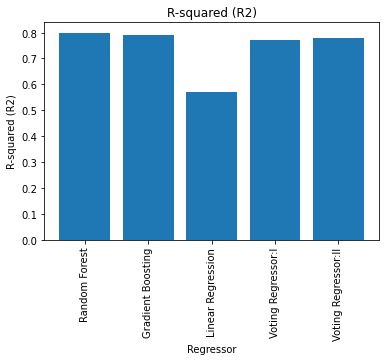

/var/folders/bd/j2nflt_j2rb8jwwv_ggtqnn40000gn/T/ipykernel_53846/2998015216.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Regressor'], rotation=90)


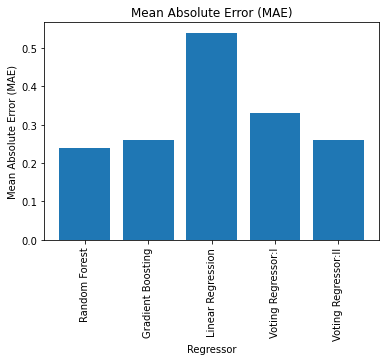

In [70]:
import pandas as pd

data = {'Regressor': ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'Voting Regressor:I', 'Voting Regressor:II'],
        'RMSE Train': [0.42, 0.45, 0.43, 0.47, 0.45],
        'RMSE Validation': [0.44, 0.45, 0.48, 0.47, 0.46],
        'RMSE Test': [0.44, 0.45, 0.43, 0.47, 0.46],
        'Mean Absolute Error (MAE)': [0.24, 0.26, 0.54, 0.33, 0.26],
        'R-squared (R2)': [0.80, 0.79, 0.57, 0.77, 0.78]}

df = pd.DataFrame(data)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df['Regressor'], df['R-squared (R2)'])
ax.set_title('R-squared (R2)')
ax.set_xlabel('Regressor')
ax.set_ylabel('R-squared (R2)')
# set the x-tick labels vertically
ax.set_xticklabels(df['Regressor'], rotation=90)
plt.show()
fig, ax = plt.subplots()
ax.bar(df['Regressor'], df['Mean Absolute Error (MAE)'])
ax.set_title('Mean Absolute Error (MAE)')
ax.set_xlabel('Regressor')
ax.set_ylabel('Mean Absolute Error (MAE)')

# set the x-tick labels vertically
ax.set_xticklabels(df['Regressor'], rotation=90)

plt.show()


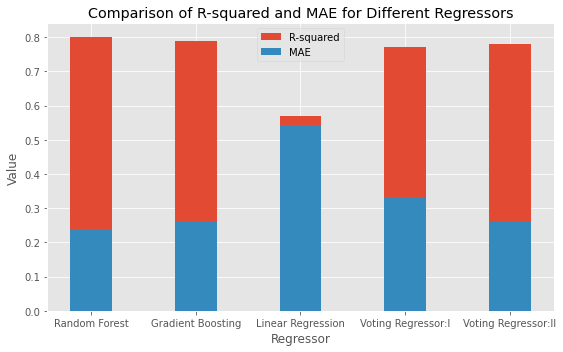

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas dataframe with the data
data = {'Regressor': ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'Voting Regressor:I', 'Voting Regressor:II'],
        'R-squared': [0.80, 0.79, 0.57, 0.77, 0.78],
        'MAE': [0.24, 0.26, 0.54, 0.33, 0.26]}
df = pd.DataFrame(data)

# Set the style
plt.style.use('ggplot')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 5))

# Create the bar plots for R-squared and MAE
ax.bar(df['Regressor'], df['R-squared'], width=0.4, label='R-squared')
ax.bar(df['Regressor'], df['MAE'], width=0.4, label='MAE')

# Add axis labels and title
ax.set_xlabel('Regressor')
ax.set_ylabel('Value')
ax.set_title('Comparison of R-squared and MAE for Different Regressors')

# Add a legend and adjust the layout
ax.legend()
plt.tight_layout()

# Display the plot
plt.show()


In [72]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
# load data
data = df_scaled
# drop correlated features
data = data.drop(to_drop, axis=1)

# apply PCA to extract top 5 principal components
pca = PCA(n_components=5)
pca.fit(data)
X_pca = pca.transform(data)

# summarize explained variance ratio of each principal component
explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])
columns = pd.DataFrame(['PC' + str(i+1) for i in range(X_pca.shape[1])], columns=['PC'])

# concatenate selected principal components
selected_components = pd.concat([columns, explained_variance_ratio], axis=1)

# print selected components
print(selected_components)



# select the top 2 principal components that explain at least 50% of the variance
selected_features = X_pca[:, :2]

print("selected_features", selected_features)


# calculate correlation matrix
corr_matrix = data.corr()
print("corr_matrix",corr_matrix)
# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
print("upper ",upper )
# find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print("to_drop",to_drop)



    PC  Explained Variance Ratio
0  PC1                  0.387869
1  PC2                  0.177572
2  PC3                  0.163242
3  PC4                  0.139692
4  PC5                  0.093628
selected_features [[ 2.25044398  0.13383169]
 [ 2.25044398  0.13383169]
 [ 2.25044398  0.13383169]
 ...
 [-1.12292746  0.43307007]
 [ 1.89395734  0.49164469]
 [ 1.48210561  2.13784405]]
corr_matrix                             Fiscal Year  Agency Name  \
Fiscal Year                    1.000000    -0.018342   
Agency Name                   -0.018342     1.000000   
Leave Status as of June 30     0.035885     0.007069   
Base Salary                    0.073928     0.267055   
Pay Basis                     -0.017997    -0.410751   
Regular Hours                 -0.014535     0.409239   

                            Leave Status as of June 30  Base Salary  \
Fiscal Year                                   0.035885     0.073928   
Agency Name                                   0.007069     0.267055  

In [73]:
from sklearn.decomposition import PCA
import pandas as pd

# initialize PCA with n_components=5
pca = PCA(n_components=5)

# fit and transform data
X_pca = pca.fit_transform(data)

# get the coefficients of each feature in the principal components
feature_coef = pd.DataFrame(pca.components_, columns=data.columns)

print(feature_coef)





   Fiscal Year  Agency Name  Leave Status as of June 30  Base Salary  \
0     0.024175     0.422480                   -0.086542     0.529801   
1     0.675093    -0.054264                    0.659680     0.187325   
2    -0.643931     0.288053                    0.701476    -0.098128   
3    -0.356240    -0.583608                   -0.037609     0.489412   
4    -0.016794    -0.611188                    0.252131    -0.005962   

   Pay Basis  Regular Hours  
0  -0.573894       0.450991  
1  -0.123614      -0.236127  
2  -0.022198      -0.013687  
3  -0.325634      -0.430719  
4   0.090904       0.744512  


In [74]:
import numpy as np

# Select the target variable
target = data['Base Salary']

# Calculate the absolute correlation coefficients
corr_abs = np.abs(data.corrwith(target))

# Sort the correlation coefficients in descending order
corr_abs_sorted = corr_abs.sort_values(ascending=False)

# Print the sorted correlation coefficients
print(corr_abs_sorted)


Base Salary                   1.000000
Pay Basis                     0.753448
Regular Hours                 0.335444
Agency Name                   0.267055
Fiscal Year                   0.073928
Leave Status as of June 30    0.056223
dtype: float64


In [75]:
df_scaled

,Fiscal Year,Agency Name,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,0.736147,1.599570,-0.362835,0.970085,-0.733089,1.309987,1.048680,-0.382988,-0.354158,-0.485691
1,0.736147,1.599570,-0.362835,0.970085,-0.733089,1.309987,1.048680,-0.382988,-0.354158,-0.485691
2,0.736147,1.599570,-0.362835,0.970085,-0.733089,1.309987,1.048680,-0.382988,-0.354158,-0.485691
3,0.736147,1.599570,-0.362835,0.970085,-0.733089,1.309987,1.048680,-0.382988,-0.354158,-0.485691
4,0.736147,1.599570,-0.362835,0.970085,-0.733089,1.309987,1.048680,-0.382988,-0.354158,-0.485691
...,...,...,...,...,...,...,...,...,...,...
5109770,1.511893,1.762657,1.490158,1.528770,-0.733089,-0.689551,-0.980922,-0.382988,-0.354158,-0.171959
5109771,1.511893,1.762657,1.490158,0.643396,-0.733089,0.361590,-0.094647,-0.382988,-0.354158,-0.485691
5109772,1.511893,1.762657,-0.362835,-1.032036,1.854333,-0.719753,-1.045543,-0.382988,-0.354158,-0.485691
5109773,1.511893,1.762657,-0.362835,0.131767,-0.733089,1.309987,0.183778,-0.382988,-0.354158,-0.485691


In [76]:


from sklearn.model_selection import train_test_split

X = df_scaled[['Regular Gross Paid', 'Pay Basis', 'Total Other Pay', 'Regular Hours', 'Agency Name']]
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [77]:
X

,Regular Gross Paid,Pay Basis,Total Other Pay,Regular Hours,Agency Name
0,1.048680,-0.733089,-0.485691,1.309987,1.599570
1,1.048680,-0.733089,-0.485691,1.309987,1.599570
2,1.048680,-0.733089,-0.485691,1.309987,1.599570
3,1.048680,-0.733089,-0.485691,1.309987,1.599570
4,1.048680,-0.733089,-0.485691,1.309987,1.599570
...,...,...,...,...,...
5109770,-0.980922,-0.733089,-0.171959,-0.689551,1.762657
5109771,-0.094647,-0.733089,-0.485691,0.361590,1.762657
5109772,-1.045543,1.854333,-0.485691,-0.719753,1.762657
5109773,0.183778,-0.733089,-0.485691,1.309987,1.762657


In [78]:
y

0          0.970085
1          0.970085
2          0.970085
3          0.970085
4          0.970085
             ...   
5109770    1.528770
5109771    0.643396
5109772   -1.032036
5109773    0.131767
5109774    0.760418
Name: Base Salary, Length: 5109775, dtype: float64

In [79]:
#he performance of regression models is typically evaluated using metrics such as mean squared error (MSE), mean absolute error (MAE), and coefficient of determination (R-squared).
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_reg.predict(X_train)
y_pred_val = rf_reg.predict(X_val)
y_pred_test = rf_reg.predict(X_test)

# Evaluate the model
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)




# Print the evaluation metrics
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Validation: {rmse_val:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")






RMSE Train: 0.06
RMSE Validation: 0.15
RMSE Test: 0.15


In [80]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



# make predictions on the testing set
y_pred = rf_reg.predict(X_test)

# calculate the MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.04492224102286151
R-squared (R2): 0.9775260856156966


In [81]:
#using Gradient boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

y_pred_train_gb = gb_reg.predict(X_train)
y_pred_val_gb = gb_reg.predict(X_val)
y_pred_test_gb = gb_reg.predict(X_test)

rmse_train_gb = mean_squared_error(y_train, y_pred_train_gb, squared=False)
rmse_val_gb = mean_squared_error(y_val, y_pred_val_gb, squared=False)
rmse_test_gb = mean_squared_error(y_test, y_pred_test_gb, squared=False)






In [82]:
# Print the evaluation metrics for Gradient Boositing
print("Gradient Boositing:")
print(f"RMSE Train: {rmse_train_gb:.2f}")
print(f"RMSE Validation: {rmse_val_gb:.2f}")
print(f"RMSE Test: {rmse_test_gb:.2f}")





Gradient Boositing:
RMSE Train: 0.21
RMSE Validation: 0.21
RMSE Test: 0.21


In [83]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd



# make predictions on the testing set
y_pred = gb_reg.predict(X_test)

# calculate the MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.09453775697974673
R-squared (R2): 0.9551072201780421


In [84]:

#using Linear Regression
from sklearn.linear_model import LinearRegression

# Instantiate the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_pred_train_lr = lin_reg.predict(X_train)
y_pred_val_lr = lin_reg.predict(X_val)
y_pred_test_lr = lin_reg.predict(X_test)



# Calculate evaluation metrics for linear regression
rmse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
rmse_val_lr = mean_squared_error(y_val, y_pred_val_lr)
rmse_test_lr = mean_squared_error(y_test, y_pred_test_lr)




# Print the evaluation metrics for linear regression
print("Linear Regression:")
print(f"RMSE Train: {rmse_train_lr:.2f}")
print(f"RMSE Validation: {rmse_val_lr:.2f}")
print(f"RMSE Test: {rmse_test_lr:.2f}")






Linear Regression:
RMSE Train: 0.18
RMSE Validation: 0.18
RMSE Test: 0.18


In [85]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd



# make predictions on the testing set
y_pred = lin_reg.predict(X_test)

# calculate the MAE and R2 scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.2903933872572498
R-squared (R2): 0.8185214211949419


In [86]:
#voting regressor

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create three different regression models
model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=4)
model3 = RandomForestRegressor(n_estimators=100)

# Create the voting regressor
voting_reg_1 = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('rf', model3)])

# Fit the model on the training data
voting_reg_1.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = voting_reg.predict(X_test)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=4)),
                            ('rf', RandomForestRegressor())])

In [87]:
# Make predictions on the training, validation, and test sets
y_train_pred = voting_reg_1.predict(X_train)
y_val_pred = voting_reg_1.predict(X_val)
y_test_pred = voting_reg_1.predict(X_test)

# Calculate RMSE for training, validation, and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)



# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)
print("Result of Voting Regressor I")
# Print the results
print("RMSE (Train):", rmse_train)
print("RMSE (Validation):", rmse_val)
print("RMSE (Test):", rmse_test)

print("MAE (Test):", mae_test)
print("R-squared (Test):", r2_test)


Result of Voting Regressor I
RMSE (Train): 0.2217791994238325
RMSE (Validation): 0.2379709180510653
RMSE (Test): 0.23666622483804214
MAE (Test): 0.1423480579830645
R-squared (Test): 0.9440173010584187


In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Create the voting regressor
voting_reg_2 = VotingRegressor(estimators=[('rf', RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1)),
                                         ('neigh', KNeighborsRegressor(n_neighbors=2)),
                                         ('et', ExtraTreesRegressor(max_depth=10, random_state=1)),
                                         ('gb', GradientBoostingRegressor(max_depth=10, random_state=1))],
                              weights=[1, 2, 1, 1])

# Fit the model on the training data
voting_reg_2.fit(X_train, y_train)



VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=50,
                                                   random_state=1)),
                            ('neigh', KNeighborsRegressor(n_neighbors=2)),
                            ('et',
                             ExtraTreesRegressor(max_depth=10, random_state=1)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=10,
                                                       random_state=1))],
                weights=[1, 2, 1, 1])

In [90]:
# Make predictions on the training, validation, and test sets
y_train_pred = voting_reg_2.predict(X_train)
y_val_pred = voting_reg_2.predict(X_val)
y_test_pred = voting_reg_2.predict(X_test)

# Calculate RMSE for training, validation, and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)



# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the test set
r2_test = r2_score(y_test, y_test_pred)
print("Result of Voting Regressor I")
# Print the results
print("RMSE (Train):", rmse_train)
print("RMSE (Validation):", rmse_val)
print("RMSE (Test):", rmse_test)

print("MAE (Test):", mae_test)
print("R-squared (Test):", r2_test)


Result of Voting Regressor I
RMSE (Train): 0.12486028268187242
RMSE (Validation): 0.15405754277278869
RMSE (Test): 0.1535994223042036
MAE (Test): 0.06057899080175201
R-squared (Test): 0.9764190970860177


In [91]:
import pandas as pd

data = {
    'Regressor': ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'Voting Regressor:I', 'Voting Regressor:II'],
    'RMSE Train': [0.06, 0.21, 0.18, 0.22, 0.12],
    'RMSE Validation': [0.15, 0.21, 0.18, 0.23, 0.15],
    'RMSE Test': [0.15, 0.21, 0.18, 0.23, 0.15],
    'Mean Absolute Error (MAE)': [0.04, 0.09, 0.29, 0.14, 0.06],
    'R-squared (R2)': [0.97, 0.95, 0.81, 0.94, 0.97]
}

df = pd.DataFrame(data)

In [92]:
df

,Regressor,RMSE Train,RMSE Validation,RMSE Test,Mean Absolute Error (MAE),R-squared (R2)
0,Random Forest,0.06,0.15,0.15,0.04,0.97
1,Gradient Boosting,0.21,0.21,0.21,0.09,0.95
2,Linear Regression,0.18,0.18,0.18,0.29,0.81
3,Voting Regressor:I,0.22,0.23,0.23,0.14,0.94
4,Voting Regressor:II,0.12,0.15,0.15,0.06,0.97


/var/folders/bd/j2nflt_j2rb8jwwv_ggtqnn40000gn/T/ipykernel_53846/3569289119.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Regressor'], rotation=90, color='blue')


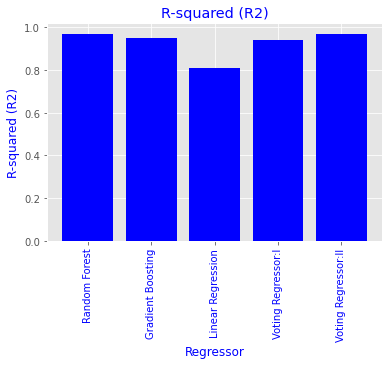

In [93]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.bar(df['Regressor'], df['R-squared (R2)'])
# ax.set_title('R-squared (R2)')
# ax.set_xlabel('Regressor')
# ax.set_ylabel('R-squared (R2)')
# # set the x-tick labels vertically
# ax.set_xticklabels(df['Regressor'], rotation=90)
# plt.show()


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df['Regressor'], df['R-squared (R2)'], color='blue')
ax.set_title('R-squared (R2)', color='blue')
ax.set_xlabel('Regressor', color='blue')
ax.set_ylabel('R-squared (R2)', color='blue')

# set the x-tick labels vertically
ax.set_xticklabels(df['Regressor'], rotation=90, color='blue')

plt.show()



/var/folders/bd/j2nflt_j2rb8jwwv_ggtqnn40000gn/T/ipykernel_53846/1237018456.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Regressor'], rotation=90, color='blue')


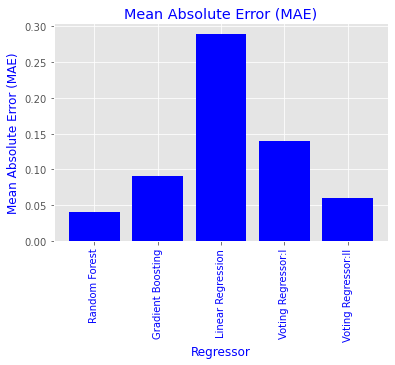

In [94]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ax.bar(df['Regressor'], df['Mean Absolute Error (MAE)'])
# ax.set_title('Mean Absolute Error (MAE)')
# ax.set_xlabel('Regressor')
# ax.set_ylabel('Mean Absolute Error (MAE)')

# # set the x-tick labels vertically
# ax.set_xticklabels(df['Regressor'], rotation=90)

# plt.show()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df['Regressor'], df['Mean Absolute Error (MAE)'], color='blue')
ax.set_title('Mean Absolute Error (MAE)', color='blue')
ax.set_xlabel('Regressor', color='blue')
ax.set_ylabel('Mean Absolute Error (MAE)', color='blue')

# set the x-tick labels vertically
ax.set_xticklabels(df['Regressor'], rotation=90, color='blue')

plt.show()


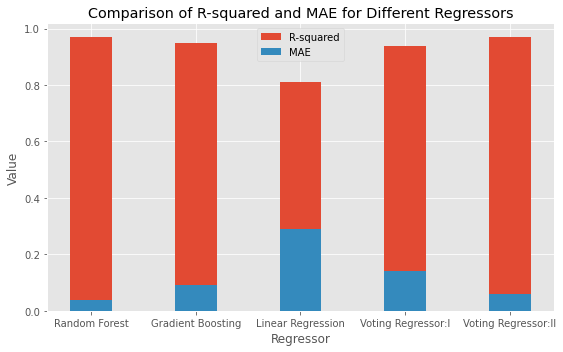

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas dataframe with the data
data = {'Regressor': ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'Voting Regressor:I', 'Voting Regressor:II'],
        'R-squared': [0.97, 0.95, 0.81, 0.94, 0.97],
        'MAE': [0.04, 0.09, 0.29, 0.14, 0.06]}
df = pd.DataFrame(data)

# Set the style
plt.style.use('ggplot')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 5))

# Create the bar plots for R-squared and MAE
ax.bar(df['Regressor'], df['R-squared'], width=0.4, label='R-squared')
ax.bar(df['Regressor'], df['MAE'], width=0.4, label='MAE')

# Add axis labels and title
ax.set_xlabel('Regressor')
ax.set_ylabel('Value')
ax.set_title('Comparison of R-squared and MAE for Different Regressors')

# Add a legend and adjust the layout
ax.legend()
plt.tight_layout()

# Display the plot
plt.show()
